In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization ,Activation
from tensorflow.keras.models import Model, Sequential
from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = r'C:\Users\arain\Desktop\archive (1)\train\train/'
TEST_DIR = r'C:\Users\arain\Desktop\archive (1)\test\test/'


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )
₹

In [45]:
train_dataset  = train_datagen.flow_from_directory(directory = TRAIN_DIR,
                                                   target_size = (48,48),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

Found 24190 images belonging to 7 classes.


In [46]:
valid_dataset = valid_datagen.flow_from_directory(directory = TRAIN_DIR,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 6046 images belonging to 7 classes.


In [49]:
test_dataset = test_datagen.flow_from_directory(directory = TEST_DIR,
                                                  target_size = (48,48),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 7178 images belonging to 7 classes.


C:\Users\arain\AppData\Local\Temp\ipykernel_39660\2144659563.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Label', y='Count', data=data, palette='viridis')


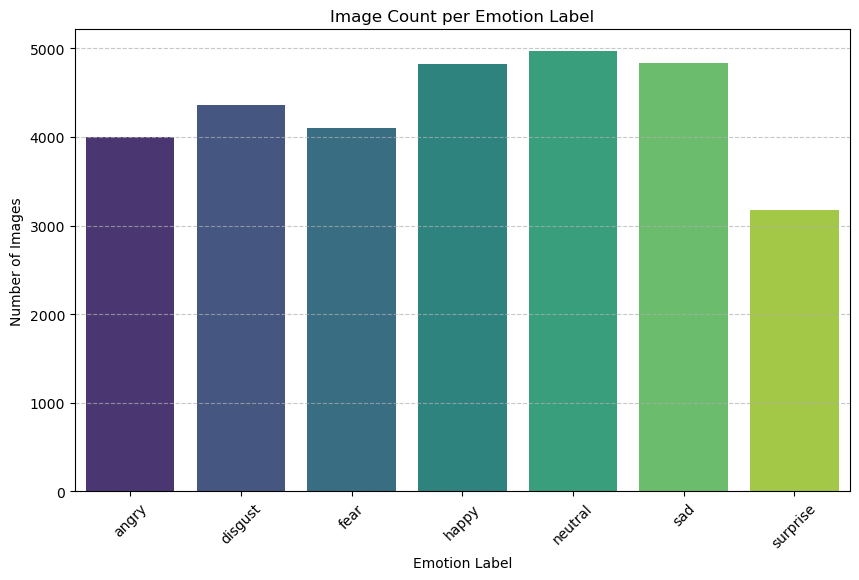

In [51]:
# Count images in each subfolder (representing labels)
labels = []
counts = []

for label in os.listdir(TRAIN_DIR):
    label_path = os.path.join(TRAIN_DIR, label)
    if os.path.isdir(label_path):  # Ensure it's a directory
        num_images = len(os.listdir(label_path))
        labels.append(label)
        counts.append(num_images)

# Create a DataFrame for plotting
data = pd.DataFrame({
    'Label': labels,
    'Count': counts
})

# Plot the count distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Label', y='Count', data=data, palette='viridis')
plt.title('Image Count per Emotion Label')
plt.xlabel('Emotion Label')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

RESNET50

In [54]:
base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")

In [55]:
# Freezing Layers

for layer in base_model.layers[:-4]:
    layer.trainable=False

In [56]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(7,activation='softmax'))

In [57]:
# Model Summary

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2, 2, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 2048)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       262,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,885,383 (91.12 MB)

 Trainable params: 1,335,815 (5.10 MB)

 Non-trainable params: 22,549,568 (86.02 MB)

In [58]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Define the F1 score function using TensorFlow
def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())

    return f1_val

In [59]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [60]:
# Callbacks
lrd = ReduceLROnPlateau(monitor='val_loss', patience=20, verbose=1, factor=0.5, min_lr=1e-10)

mcp = ModelCheckpoint('model.keras', save_best_only=True, verbose=1)

es = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

In [61]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=METRICS)

In [62]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs = 100,verbose = 1)

C:\Users\arain\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 458s 1s/step - accuracy: 0.8549 - auc: 0.5427 - f1_score: 0.0174 - loss: 2.0298 - precision: 0.2875 - recall: 0.0091 - val_accuracy: 0.8595 - val_auc: 0.5826 - val_f1_score: 0.0331 - val_loss: 1.8904 - val_precision: 0.9720 - val_recall: 0.0172
Epoch 2/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 530s 1s/step - accuracy: 0.8596 - auc: 0.6123 - f1_score: 0.0710 - loss: 1.8645 - precision: 0.6453 - recall: 0.0377 - val_accuracy: 0.8599 - val_auc: 0.6060 - val_f1_score: 0.0386 - val_loss: 1.8799 - val_precision: 0.9677 - val_recall: 0.0198
Epoch 3/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 293s 774ms/step - accuracy: 0.8609 - auc: 0.6353 - f1_score: 0.0948 - loss: 1.8239 - precision: 0.6719 - recall: 0.0512 - val_accuracy: 0.8596 - val_auc: 0.5860 - val_f1_score: 0.1115 - val_loss: 1.9016 - val_precision: 0.5800 - val_recall: 0.0624
Epoch 4/100
378/378 ━━━━━━━━━━━━━━━━━━━━ 5945s 16s/step - accuracy: 0.8614 - auc: 0.6429 - f1_score: 0.1032 - loss: 1.8086 - precision: 0.6

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    
    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])


    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
               history.history['auc'],history.history['val_auc'],
               history.history['precision'],history.history['val_precision'],
               history.history['f1_score'],history.history['val_f1_score']
              )

In [ ]:
# Save the model
model.save('fer_vgg16_model.h5')

print("Model training completed and saved.")


CONFUSION MATRIX

TEST

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad' , 'surprise']  
le.fit(class_names) 


images, labels = next(test_dataset)  # Fetch a batch of images and labels from the test dataset

# Generate predictions and store original and predicted labels
original_labels = []
predicted_labels = []
images_to_display = []

# Correct prediction count
correct_predictions = 0

# Loop through the batch to process 10 images
for i in range(10):
    image = images[i]  # Get the current image
    label = labels[i]  # Get the corresponding label
    
    # Convert the image to grayscale if it's RGB (to match original 1 channel input)
    if image.shape[-1] == 3:
        image = np.dot(image[..., :3], [0.299, 0.587, 0.114])  # Convert RGB to grayscale
    
    # Convert grayscale to RGB by repeating across 3 channels (for model input)
    image_rgb = np.repeat(image, 3, axis=-1)  # Shape becomes (48, 48, 3)
    
    # Predict the class label using the model
    pred = model.predict(image_rgb.reshape(1, 48, 48, 3))  # Reshape to match model input shape
    prediction_label = le.inverse_transform([pred.argmax()])[0]  # Decode predicted label
    
    # Get the original label (inverse transformation)
    original_class = le.inverse_transform([label.argmax()])[0]  # Convert label index to class name
    
    # Append the original and predicted labels
    original_labels.append(original_class)
    predicted_labels.append(prediction_label)
    images_to_display.append(image_rgb)

    # Check if prediction is correct
    if original_class == prediction_label:
        correct_predictions += 1

# Calculate the probability (accuracy) of correct predictions
accuracy = correct_predictions / 10
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the images and labels
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  
axes = axes.ravel()  

# Loop through the 10 images to display them
for i in range(10):
    
    
    axes[i].imshow(images_to_display[i].reshape(48, 48, 3))  
    axes[i].set_title(f"Original: {original_labels[i]}\nPredicted: {predicted_labels[i]}")
    axes[i].axis('off')  

plt.tight_layout() 
plt.show()


not overfitting

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit(), which contains the loss and accuracy history
# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
